# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response=requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | altai
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | tanout
Processing Record 5 of Set 1 | kiri buru
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | fada
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | uyuni
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | bikenibeu village
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | yemel'yanovo
Processing Record 20 of Set 1 | sisimiut
Processing Record 21 of Set 1 | puerto baquerizo moreno
Processing Record 22 of Set 1 | mitu
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,19.04,82,40,3.09,MG,1699661180
1,altai,46.3722,96.2583,-13.65,91,33,0.83,MN,1699661183
2,hawaiian paradise park,19.5933,-154.9731,27.15,77,75,2.06,US,1699661135
3,tanout,14.9709,8.8879,26.28,17,100,4.55,NE,1699661186
4,kiri buru,22.0833,85.3500,17.13,62,22,0.08,IN,1699661193


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,19.04,82,40,3.09,MG,1699661180
1,altai,46.3722,96.2583,-13.65,91,33,0.83,MN,1699661183
2,hawaiian paradise park,19.5933,-154.9731,27.15,77,75,2.06,US,1699661135
3,tanout,14.9709,8.8879,26.28,17,100,4.55,NE,1699661186
4,kiri buru,22.0833,85.3500,17.13,62,22,0.08,IN,1699661193


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

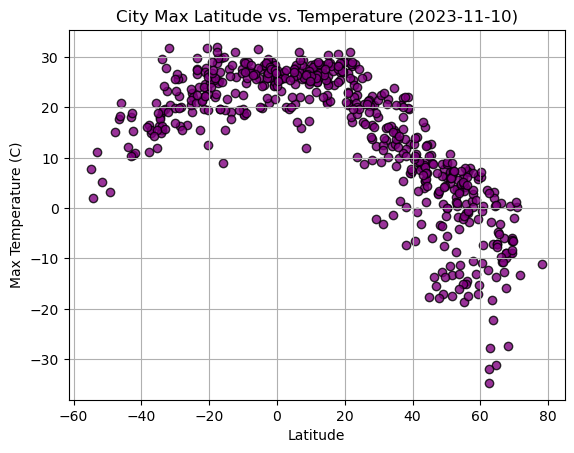

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='purple', edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-11-10)')
plt.ylabel("Max Temperature (C)")
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

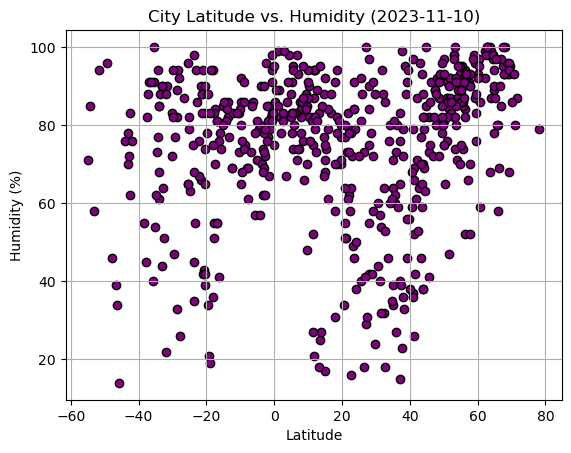

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='purple', edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-11-10)')
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

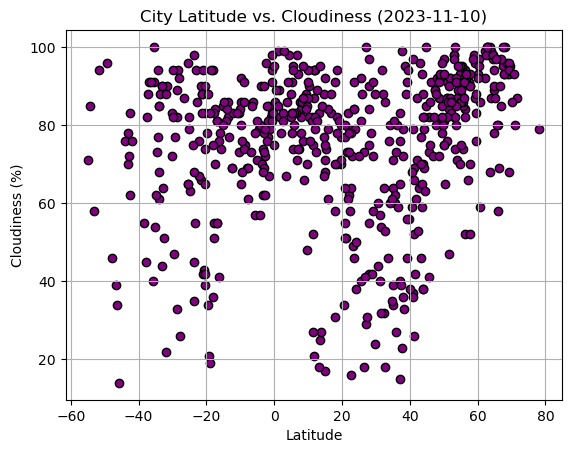

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='purple', edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-11-10)')
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

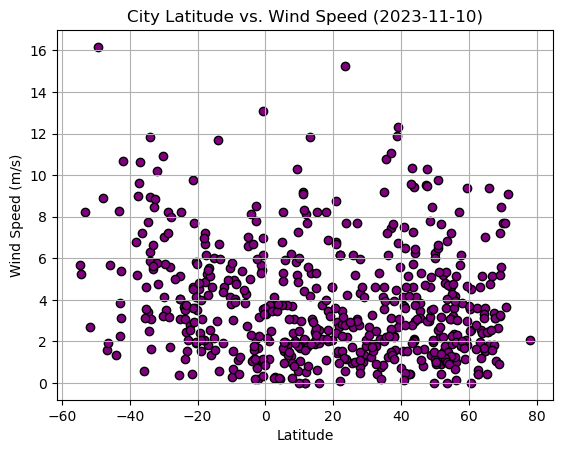

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='purple', edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-11-10)')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,altai,46.3722,96.2583,-13.65,91,33,0.83,MN,1699661183
2,hawaiian paradise park,19.5933,-154.9731,27.15,77,75,2.06,US,1699661135
3,tanout,14.9709,8.8879,26.28,17,100,4.55,NE,1699661186
4,kiri buru,22.0833,85.3500,17.13,62,22,0.08,IN,1699661193
6,tiksi,71.6872,128.8694,-13.30,87,100,9.10,RU,1699661098


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,19.04,82,40,3.09,MG,1699661180
5,port-aux-francais,-49.3500,70.2167,3.22,96,100,16.17,TF,1699661106
8,papatowai,-46.5619,169.4708,17.68,39,0,1.59,NZ,1699661112
9,hithadhoo,-0.6000,73.0833,26.87,84,89,6.18,MV,1699661200
10,lebu,-37.6167,-73.6500,11.17,82,82,8.98,CL,1699661130


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8564957528799455


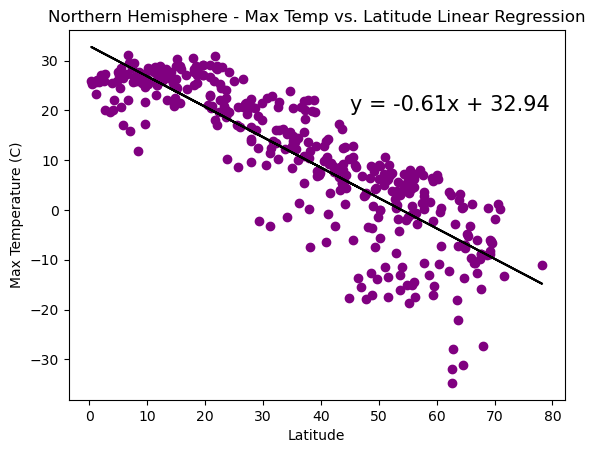

In [15]:
# Linear regression on Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

regress_values = northern_hemi_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='purple')
plt.plot(northern_hemi_df['Lat'], regress_values, color='black')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq, (45, 20), fontsize=15, color="black")

print(f'The r-value is: {rvalue}')

The r-value is: 0.6689780597009073


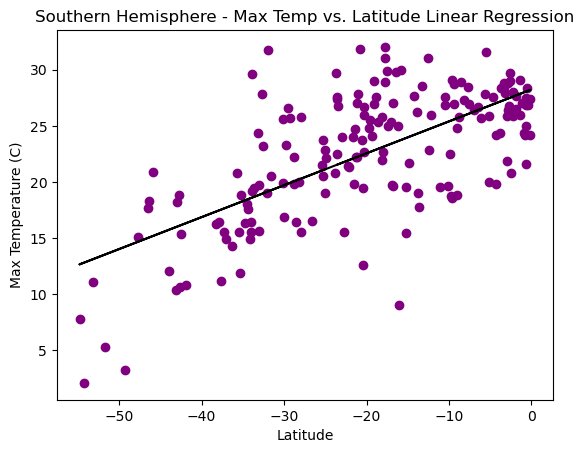

In [16]:
# Linear regression on Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

regress_values = southern_hemi_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='purple')
plt.plot(southern_hemi_df['Lat'], regress_values, color='black')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq, (-55, 35), fontsize=15, color="black")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In looking at the linear relationship between Max Temperature and Latitude, you can see that as you move further away from the equator (0 Latitude), the max temperature decreases. In other words, the weather is warmer the closer you are to the equator, and becomes colder as you move away from the equator.

The relationship of max temp vs. latitude for the northern hemisphere is negative, so as the latitude moves further away from 0, the temperatures drop.

The relationship of max temp vs. latitude for the southern hemisphere is negative, meaning as the latitude moves toward 0, the temperatures rise.

The r-values of these relationships are -0.86 and 0.65, respectively. This indicates a strong linear relationship, although the northern hemisphere has a stronger relationship than the southern hemisphere. This supports the conclusion that you can reasonably expect temperatures to rise as you move toward the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2236627884281776


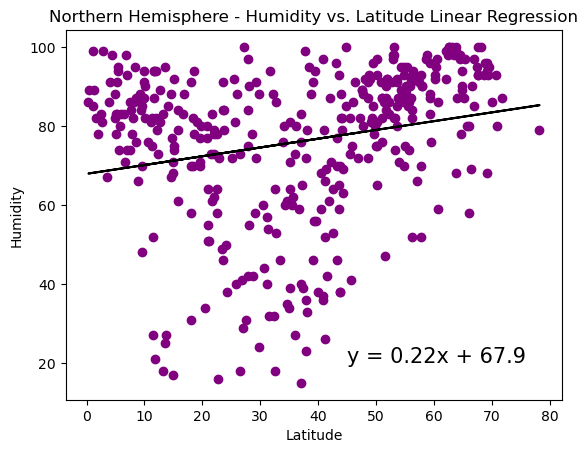

In [17]:
# Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

regress_values = northern_hemi_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='purple')
plt.plot(northern_hemi_df['Lat'], regress_values, color='black')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(line_eq, (45, 20), fontsize=15, color="black")

print(f'The r-value is: {rvalue}')

The r-value is: 0.1804819046095537


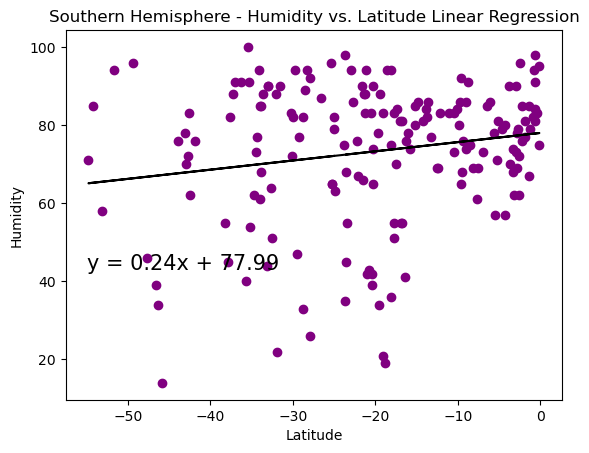

In [18]:
# Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

regress_values = southern_hemi_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='purple')
plt.plot(southern_hemi_df['Lat'], regress_values, color='black')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(line_eq, (-55, 43), fontsize=15, color="black")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relationships between Humidity and Latitude are not as strong and straightforward as they were with Temperature.

The northern hemisphere regression does show a general positive relationship between the two factors, indicating that as you move away from the equator, the humidity rises. However, the r-value is only 0.34, meaning that the two are not related strongly enough to use this relationship as a means of predictability.

The southern hemisphere shows almost no relationship at all between the two (r-value .08), meaning that humidity is not generally dependent on proximity to the equator.

It is interesting to note that the r-value of the Southern Hemisphere is still significantly less than that of the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10171841433967743


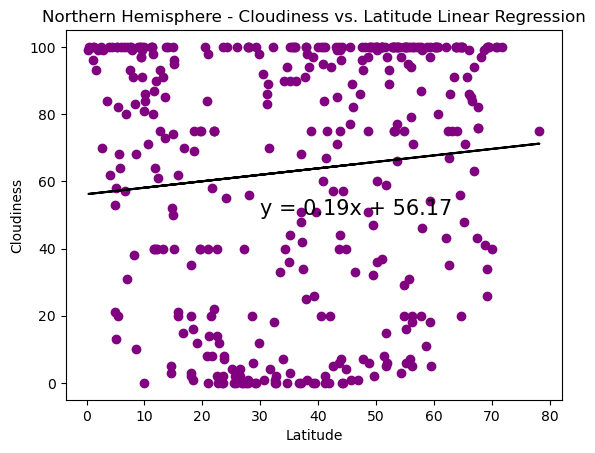

In [19]:
# Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

regress_values = northern_hemi_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='purple')
plt.plot(northern_hemi_df['Lat'], regress_values, color='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(line_eq, (30, 50), fontsize=15, color="black")

print(f'The r-value is: {rvalue}')

The r-value is: 0.014487672371303804


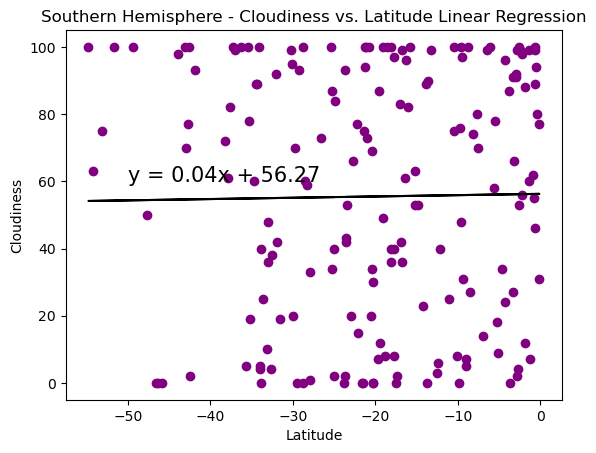

In [20]:
# Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

regress_values = southern_hemi_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='purple')
plt.plot(southern_hemi_df['Lat'], regress_values, color='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(line_eq, (-50, 60), fontsize=15, color="black")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As with humidity, the relationship between cloudiness and latitude is vaguely positive. The r-values of both the northern and southern hemisphere are very low, however, meaning that these relationships would be poor factors to use in predicting how cloudy the weather will be in proximity to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03410819792876299


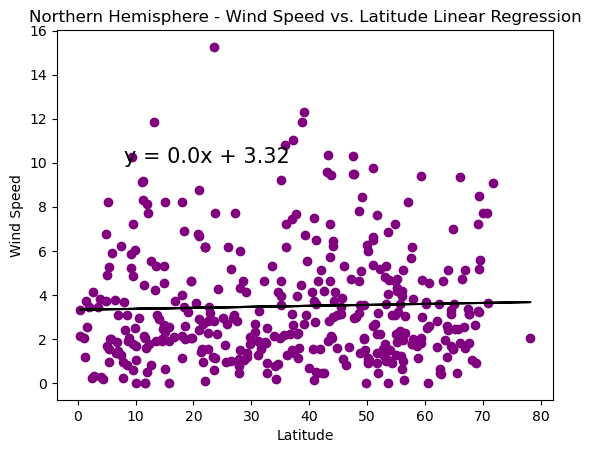

In [21]:
# Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

regress_values = northern_hemi_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='purple')
plt.plot(northern_hemi_df['Lat'], regress_values, color='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(line_eq, (8, 10), fontsize=15, color="black")

print(f'The r-value is: {rvalue}')

The r-value is: -0.2949863414569174


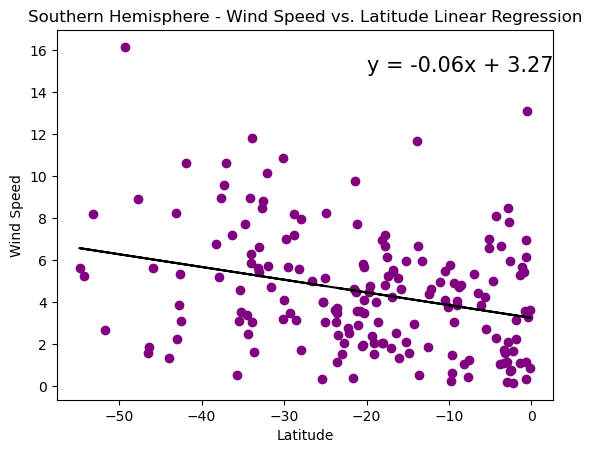

In [22]:
# Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

regress_values = southern_hemi_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='purple')
plt.plot(southern_hemi_df['Lat'], regress_values, color='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(line_eq, (-20, 15), fontsize=15, color="black")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As with the previous two regressions, these also show very low r-values. This indicates that while temperature can reasonably be predicted by proximity, humidity, cloudiness, and wind speed have very weak relationships to latitude and cannot be used as a predictive factor in relationship to latitude.